In [1]:
data = [[1, 0, 0, 0]]

H0 = 67.4
OmegaL = 0.68
OmegaM = 1 - OmegaL
H0 = H0 / 3.08e19 * 60 * 60 * 24 * 365 * 1e6
H = H0
c = 1
z = 0
t = 0

x = 0
a = 1

objs = []
for n in range(20):
    objs.append({"x": n * 1000, "x0": n * 1000, "data": [n * 1000]})

while x >= 0:
    t -= 1
    x += c - H * x
    
    a -= H * a
    
    for obj in objs:
        obj["x"] -= H * obj["x"]
        obj["data"].append(obj["x"])
    
    
    H = H0 * (OmegaM * a**-3 + OmegaL)**0.5

    data.append([a, t, x, x * (1 + z)])

tbb = t

In [2]:
data.reverse()

z = 0
t = 0
x = 0
a = 1

n = 0
for obj in objs:
    obj["x"] = n * 1000
    obj["data"].reverse()
    n += 1

H = H0

while t < 40000:
    t += 1

    x += c + H * x    
    a += H * a
    
    for obj in objs:
        obj["x"] += H * obj["x"]
        obj["data"].append(obj["x"])
    
    
    H = H0 * (OmegaM * a**-3 + OmegaL)**0.5

    data.append([a, t, x, x * (1 + z)])


In [3]:
data2 = [[1, 0, 0, 0]]

H0 = 67.4 * 0.68**0.5
H0cap = H0
OmegaL = 1
OmegaM = 1 - OmegaL
H0 = H0 / 3.08e19 * 60 * 60 * 24 * 365 * 1e6
H = H0
c = 1
z = 0
t = 0

x = 0
a = 1

while t > tbb:
    t -= 1
    x += c - H * x
    
    a -= H * a
    
    
    H = H0 * (OmegaM * a**-3 + OmegaL)**0.5

    data2.append([a, t, x, x * (1 + z)])


In [4]:
data2.reverse()

z = 0
t = 0
x = 0
a = 1

H = H0

while t < 40000:
    t += 1

    x += c + H * x    
    a += H * a
    
    H = H0 * (OmegaM * a**-3 + OmegaL)**0.5

    data2.append([a, t, x, x * (1 + z)])


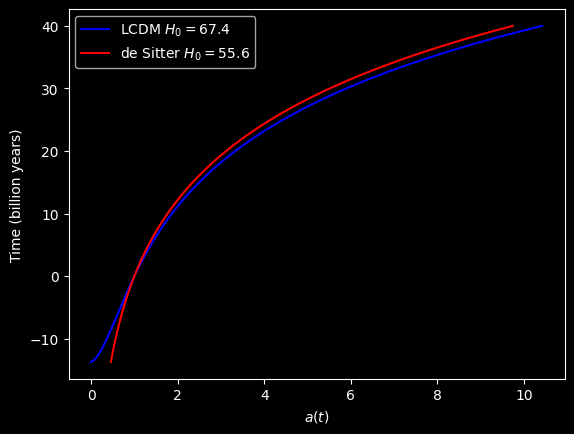

In [5]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
dataz = []
dataz2 = []
dataC = []
dataA = []
dataT = []


for i in range(len(data)):
    dataz.append(data[i][0])
    dataT.append(data[i][1] / 1000)
    dataA.append(data[i][2])
    dataC.append(data[i][3])

for i in range(len(data2)):
    dataz2.append(data2[i][0])

#for obj in objs:
#    plt.plot(obj["data"], dataT, color = "blue")


#plt.plot(dataA, dataT, label = "photon", color = "yellow")
plt.plot(dataz, dataT, label = "LCDM $H_0 = 67.4$", color = "blue")
plt.plot(dataz2, dataT, label = "de Sitter $H_0 = " + str(55.6) +"$", color = "red")
    
plt.xlabel("$a(t)$")
plt.ylabel("Time (billion years)")
plt.legend()

plt.savefig('wl.png',  bbox_inches='tight')
plt.show()